# Variables categóricas

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("datasets/ecom-expense/Ecom Expense.csv")

In [3]:
data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
gender = pd.get_dummies(data["Gender"], prefix="Gender")
city_tier = pd.get_dummies(data["City Tier"], prefix="City")

In [5]:
columns_names = data.columns.values.tolist()
data_new = data.join(gender)
columns_names = data_new.columns.values.tolist()

In [9]:
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False


In [6]:
data_new = data_new.join(city_tier)
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False,True,False,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False,False,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True,False,True,False
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False,True,False,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False,False,True,False


In [31]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Female", "Gender_Male", "City_Tier 1", "City_Tier 2", "City_Tier 3", "Record"]
x = data_new[feature_cols]
y = data_new["Total Spend"]

In [32]:
lm = LinearRegression()
lm.fit(x, y)

LinearRegression()

In [33]:
lm.intercept_

-79.41713030137362

In [34]:
lm.coef_

array([ 1.47538980e-01,  1.54946125e-01, -1.31025013e+02,  1.31025013e+02,
        7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02])

In [35]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.1475389804920575),
 ('Transaction Time', 0.15494612549589679),
 ('Gender_Female', -131.02501325554599),
 ('Gender_Male', 131.02501325554582),
 ('City_Tier 1', 76.76432601049524),
 ('City_Tier 2', 55.13897430923264),
 ('City_Tier 3', -131.90330031972778),
 ('Record', 772.2334457445644)]

In [36]:
lm.score(x, y)

0.9179923586131016

In [37]:
data_new["prediction"] = lm.predict(x)
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False,True,False,False,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False,False,True,False,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True,False,True,False,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False,True,False,False,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False,False,True,False,3581.980335


In [55]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(data_new["Total Spend"], data_new["prediction"]))

801.600321811017

In [57]:
error = np.sqrt(mean_squared_error(data_new["Total Spend"], data_new["prediction"])) / data_new["Total Spend"].mean()

In [65]:
str(round(error*100, 2)) + "%"

'13.01%'

## Ajustar con n-1 variables indicadoras

In [67]:
Gender = pd.get_dummies(data["Gender"], prefix="Gender", drop_first=True)
city_tier = pd.get_dummies(data["City Tier"], prefix="City", drop_first=True)

In [68]:
columns_names = data.columns.values.tolist()
data_new = data.join(Gender)
data_new = data_new.join(city_tier)
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,False,False,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,False,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,True,True,False
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,False,False,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,False,True,False


In [69]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
x = data_new[feature_cols]
y = data_new["Total Spend"]

In [70]:
lm = LinearRegression()
lm.fit(x, y)

LinearRegression()

In [72]:
lm.intercept_

-133.6778175464242

In [73]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205752),
 ('Transaction Time', 0.15494612549589665),
 ('Gender_Male', 262.05002651109413),
 ('City_Tier 2', -21.62535170126264),
 ('City_Tier 3', -208.66762633022313),
 ('Record', 772.2334457445639)]

## Transformación de variables para relación no lineal

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_auto = pd.read_csv("datasets/auto/auto-mpg.csv")

In [5]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [19]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(data_auto):
    # Drop rows with missing data in columns: 'mpg', 'cylinders'
    data_auto = data_auto.dropna(subset=['mpg', 'cylinders', 'horsepower'])
    return data_auto

data_auto_clean = clean_data(data_auto.copy())
data_auto_clean.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [9]:
data_auto_clean.shape

(398, 9)

In [10]:
sns.set_theme()

Text(0.5, 1.0, 'MPG vs Horsepower')

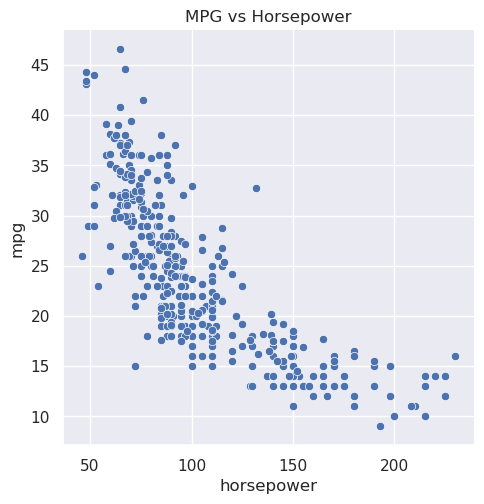

In [20]:
sns.relplot(x="horsepower", y="mpg", data=data_auto_clean, kind="scatter")
plt.title("MPG vs Horsepower")

In [21]:
data_auto_clean["horsepower"].isna().sum()

0

In [22]:
data_auto_clean["mpg"].isna().sum()

0

In [24]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
x = pd.DataFrame(data_auto_clean["horsepower"])
y = pd.DataFrame(data_auto_clean["mpg"])
lm.fit(x, y)

LinearRegression()

In [32]:
lm.score(x, y)

0.6059482578894348

0

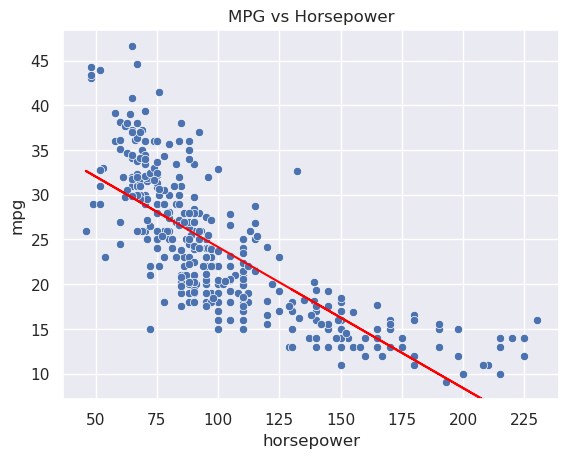

In [31]:
sns.scatterplot(x="horsepower", y="mpg", data=data_auto_clean).add_line(plt.Line2D(data_auto_clean["horsepower"], lm.predict(x), color="red")).add_callback(plt.title("MPG vs Horsepower"))

In [42]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y, lm.predict(x)))
error = rmse / y.mean()
rmse, error*100

(4.893226230065713,
 mpg    20.870269
 dtype: float64)

In [44]:
lm2 = LinearRegression()
x_new = x**2
lm2.fit(x_new, y)

LinearRegression()

In [47]:
lm2.score(x_new, y)

0.5073670089832611

In [49]:
rmse = np.sqrt(mean_squared_error(y, lm2.predict(x_new)))
error = rmse / y.mean()
rmse, error*100

(5.471172596546902,
 mpg    23.335288
 dtype: float64)

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [57]:
poly = PolynomialFeatures(degree=2)

In [58]:
X_data = poly.fit_transform(x)

In [60]:
lm3 = linear_model.LinearRegression()
lm3.fit(X_data, y)

LinearRegression()

In [79]:
lm3.score(X_data, y)

0.6875590305127517

In [83]:
lm3.coef_

array([[ 0.        , -0.46618963,  0.00123054]])

In [80]:
rmse = np.sqrt(mean_squared_error(y, lm3.predict(X_data)))
error = rmse / y.mean()
rmse, error*100

(4.3571514671419465,
 mpg    18.583838
 dtype: float64)

In [86]:
def regression_validation(lm, X_data, y):
    rmse = np.sqrt(mean_squared_error(y, lm.predict(X_data)))
    error = rmse / y.mean()
    return rmse, error*100

In [87]:
for d in range(2, 6):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(x)
    lm_temp = linear_model.LinearRegression()
    lm_temp.fit(X_data, y)
    print(f"Degree: {d}, Score: {lm_temp.score(X_data, y)}")
    print(regression_validation(lm_temp, X_data, y))

Degree: 2, Score: 0.6875590305127517
(4.3571514671419465, mpg    18.583838
dtype: float64)
Degree: 3, Score: 0.68821369312591
(4.352584268510595, mpg    18.564358
dtype: float64)
Degree: 4, Score: 0.6893436054929453
(4.344690235778036, mpg    18.530689
dtype: float64)
Degree: 5, Score: 0.6967390038651091
(4.292664509124896, mpg    18.308792
dtype: float64)


## Outliers

Text(0.5, 1.0, 'MPG vs Displacement')

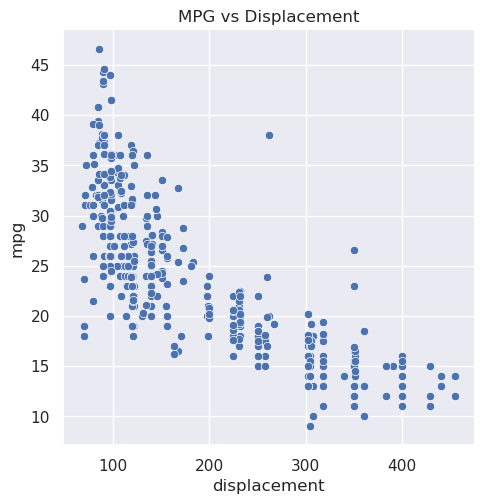

In [95]:
sns.relplot(x="displacement", y="mpg", data=data_auto_clean, kind="scatter")
plt.title("MPG vs Displacement")

In [98]:
lm_outliers = LinearRegression()
x = pd.DataFrame(data_auto_clean["displacement"])
y = pd.DataFrame(data_auto_clean["mpg"])
lm_outliers.fit(x,y)

LinearRegression()

In [102]:
lm_outliers.score(x, y)

0.6482294003193044

0

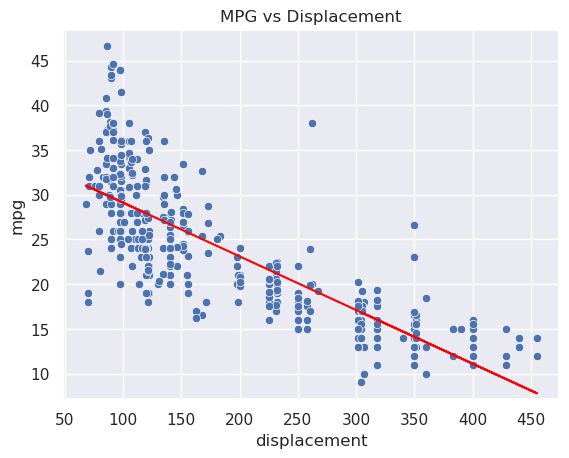

In [104]:
sns.scatterplot(x="displacement", y="mpg", data=data_auto_clean).add_line(plt.Line2D(x, lm_outliers.predict(x), color="red")).add_callback(plt.title("MPG vs Displacement"))

In [111]:
data_auto_clean.query("displacement > 250 & mpg > 35 & displacement < 300 & mpg < 40")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [114]:
data_auto_clean.query("displacement > 300 & mpg > 20")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [116]:
data_auto_clean = data_auto_clean.drop([395, 258, 305, 372], axis=0)

In [121]:
lm_outliers_2 = LinearRegression()
x = pd.DataFrame(data_auto_clean["displacement"])
y = pd.DataFrame(data_auto_clean["mpg"])
lm_outliers_2.fit(x,y)

LinearRegression()

In [122]:
lm_outliers_2.score(x, y)

0.6703131555875477

0

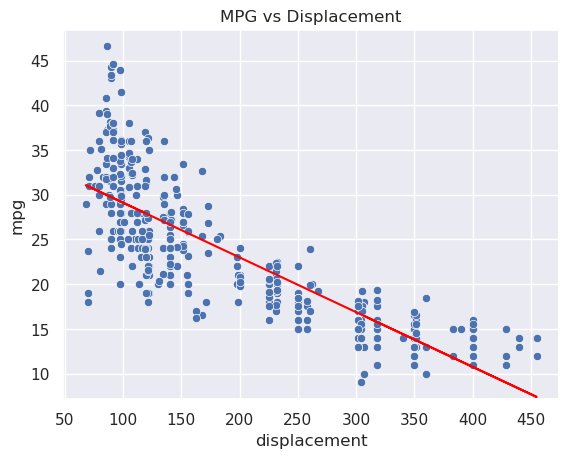

In [123]:
sns.scatterplot(x="displacement", y="mpg", data=data_auto_clean).add_line(plt.Line2D(x, lm_outliers.predict(x), color="red")).add_callback(plt.title("MPG vs Displacement"))